**Analyzing Similarity among Reviews by Score on Amazon Food Review**

In this project, data from Kaggle, consisting of food reviews spanning a period of 10 years, is used and accessed via the provided link (https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews). The most reviewed product is identified, and the similarity among user reviews for that product is analyzed. After identifying the most reviewed product ("B002QWP89S"), the results are divided into five score groups, as it is believed that analyzing similarity among reviews by score will be easier and more useful. The steps outlined are applied specifically to reviews with a score of 5, with the remaining steps and code adjusted to analyze the other score groups. The results are visualized using a heatmap to observe the degree of similarity between reviews. Only 30 data points are used, as this number provides a clear and readable heatmap, with attempts to increase the data points resulting in a less interpretable heatmap.

Stores are then classified as either "Bad Store" or "Good Store" based on the sentiment of the review text and the review scores provided by customers. Once the classification is completed, products that are not selling well in good stores are identified. Recommendations regarding possible marketing strategies, such as implementing flash sales for these products, are then made to Amazon. Additionally, the best-selling products in bad stores are identified using word clouds, with the most frequently appearing words, or those displayed more prominently, suggested to bad stores as areas for improvement.


Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Clean data

In [ ]:
import pandas as pd

# Specify the .csv file path
csv_file_path = '/content/drive/MyDrive/Study/NTUST/Big Data Analytic/Me/MidTerm/Reviews_withURL.csv'  # Update with your actual file path

# Read the .csv file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can use the DataFrame 'df' to work with the data from the .csv file

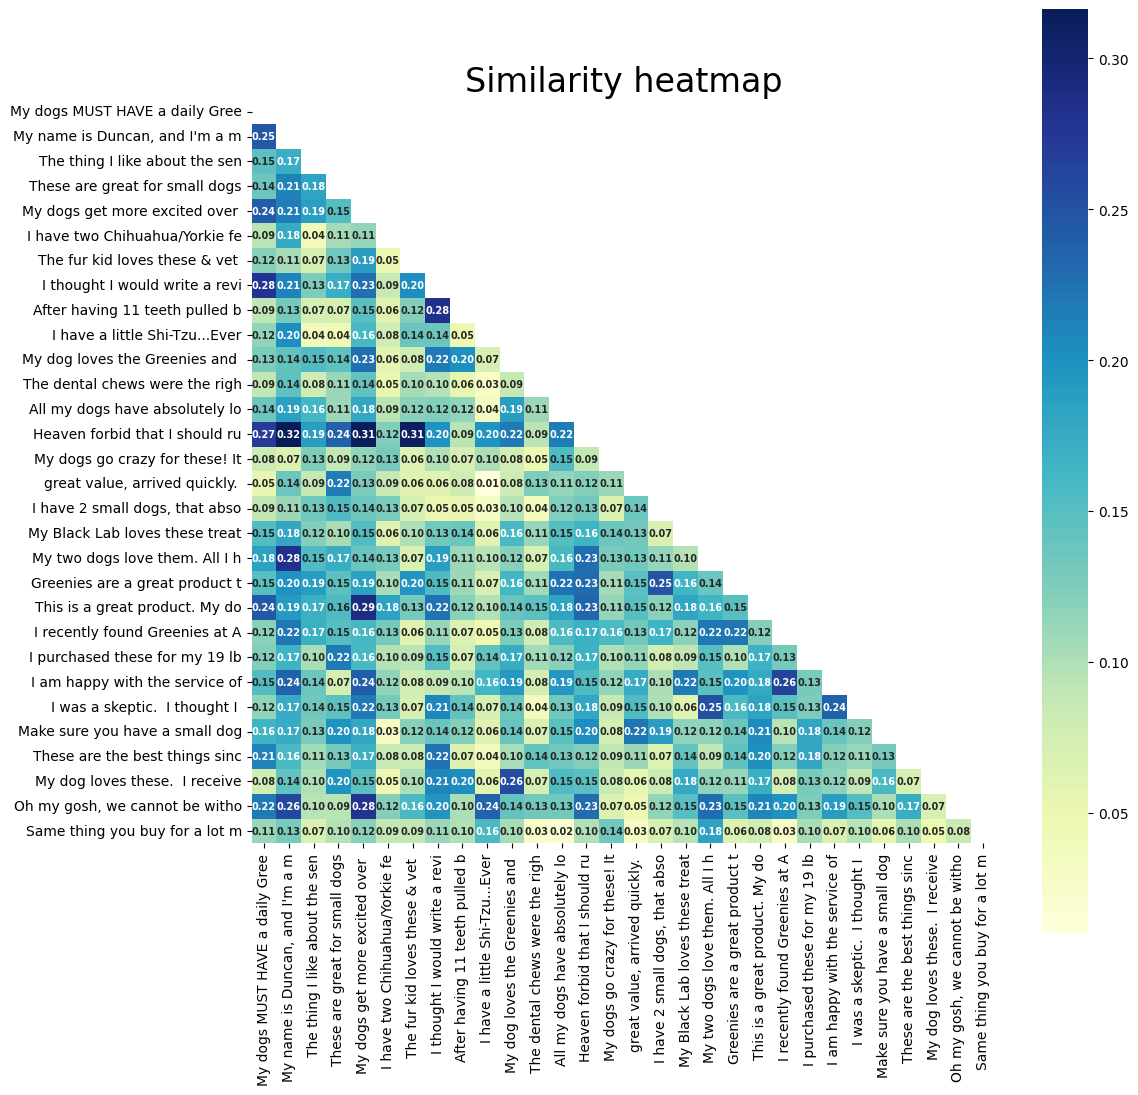

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
df_most_pos1 = df[(df['ProductId'] == "B002QWP89S") & (df['Score'] == 5)][['ProductId', 'Score', 'Text']].tail(30)

# Compute the TF-IDF matrix for the Text column
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_most_pos1['Text'])

# Compute the pairwise cosine similarity between each pair of rows
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create a heatmap to visualize the similarity scores
mask = np.zeros_like(similarity_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 12))
sns.heatmap(similarity_matrix,
            square=True,
            annot=True,
            fmt='.2f',
            annot_kws={'size': 7, 'fontweight': 'bold'},
            yticklabels=df_most_pos1['Text'].str[:30],
            xticklabels=df_most_pos1['Text'].str[:30],
            cmap="YlGnBu",
            mask=mask)

plt.title('Similarity heatmap', fontdict={'fontsize': 24})
plt.show()



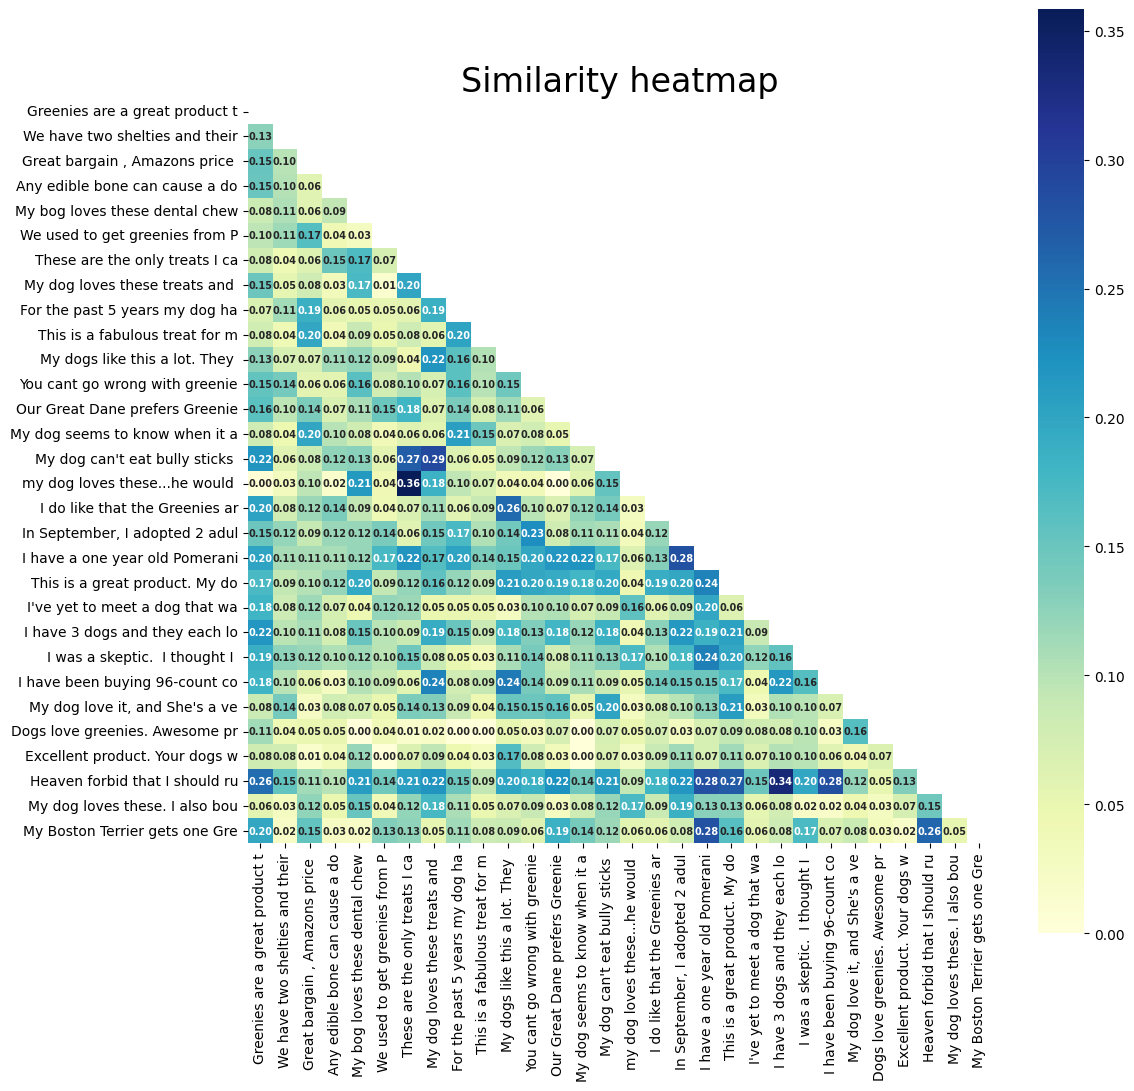

In [ ]:
#FIX
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df_most_pos5 = df[(df['ProductId'] == "B002QWP89S") & (df['Score'] == 5)].sample(n=30, random_state=42)[['ProductId', 'Score', 'Text']]

# Compute the TF-IDF matrix for the Text column
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_most_pos5['Text'])

# Compute the pairwise cosine similarity between each pair of rows
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create a heatmap to visualize the similarity scores
mask = np.zeros_like(similarity_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 12))
sns.heatmap(similarity_matrix,
            square=True,
            annot=True,
            fmt='.2f',
            annot_kws={'size': 7, 'fontweight': 'bold'},
            yticklabels=df_most_pos1['Text'].str[:30],
            xticklabels=df_most_pos1['Text'].str[:30],
            cmap="YlGnBu",
            mask=mask)

plt.title('Similarity heatmap', fontdict={'fontsize': 24})
plt.show()


Clean data in "Text" column

In [ ]:
#Delete Unnamed: and ProductURL column
# Drop the "Unnamed:" column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Get the number of rows in the original DataFrame
original_rows = df.shape[0]

# Drop duplicate rows based on the "Text" column and keep the first occurrence
df.drop_duplicates(subset='Text', keep='first', inplace=True)

# Get the number of rows in the deduplicated DataFrame
deduplicated_rows = df.shape[0]

# Print the number of rows in the original and deduplicated DataFrames
print("Number of rows in the original DataFrame: ", original_rows)
print("Number of rows in the deduplicated DataFrame: ", deduplicated_rows)

Number of rows in the original DataFrame:  568454
Number of rows in the deduplicated DataFrame:  393579


In [ ]:
df.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

                             ProductURL  
0  https://www.amazon.com/dp/B001E4KFG0  
1  https://www.amazon.com/dp/B00813GRG4  
2  https://www.amazon.com/dp/B000LQOCH0

Clean data in "Text" column

In [ ]:
#set of stopwords
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')


#function to clean the word of any html-tags
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

#function to clean the word of any punctuation or special characters
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


#function to text summarization
def final_sentence(text):

    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]

    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            s=(sno.stem(word.lower()))
            return s
        else:
            pass

    text = [test(x) for x in text if test(x)]

    return ' '.join(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.shape

from tqdm import tqdm
tqdm.pandas()

df['CleanedText'] = df['Text'].progress_apply(final_sentence)
print(df.shape)
df.head()



100%|██████████| 393579/393579 [05:43<00:00, 1144.69it/s]

(393579, 12)


Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

                             ProductURL  \
0  https://www.amazon.com/dp/B001E4KFG0   
1  https://www.amazon.com/dp/B00813GRG4   
2  https://www.amazon.com/dp/B000LQOCH0   
3  https://www.amazon.com/dp/B000UA0QIQ   
4  https://www.amazon.com/dp/B006K2ZZ7K   

                                         CleanedText  
0  bought sever vital can dog food product found ...  
1  product arriv label jumbo salt peanut actual s...  
2  confect around pillowi citrus gelatin nut case...  
3  look secret ingredi robitussin believ found go...  
4  great taffi great wide assort yummi deliveri t...

In [ ]:
import pandas as pd

# Specify the .csv file path
csv_file_path = '/content/drive/MyDrive/Study/NTUST/Big Data Analytic/Me/MidTerm/Tokenized.csv'  # Update with your actual file path

# Read the .csv file into a DataFrame
df1 = pd.read_csv(csv_file_path)

# Now you can use the DataFrame 'df' to work with the data from the .csv file

In [ ]:
df1.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

                             ProductURL  \
0  https://www.amazon.com/dp/B001E4KFG0   
1  https://www.amazon.com/dp/B00813GRG4   
2  https://www.amazon.com/dp/B000LQOCH0   

                                         CleanedText  
0  bought sever vital can dog food product found ...  
1  product arriv label jumbo salt peanut actual s...  
2  confect around pillowi citrus gelatin nut case...

Average Score by Year

Time  Score
1999  5            4
2000  1            1
      4            1
      5           15
2001  1            1
               ...  
2012  1        14463
      2         7933
      3        10970
      4        19911
      5        85808
Name: Score, Length: 62, dtype: int64


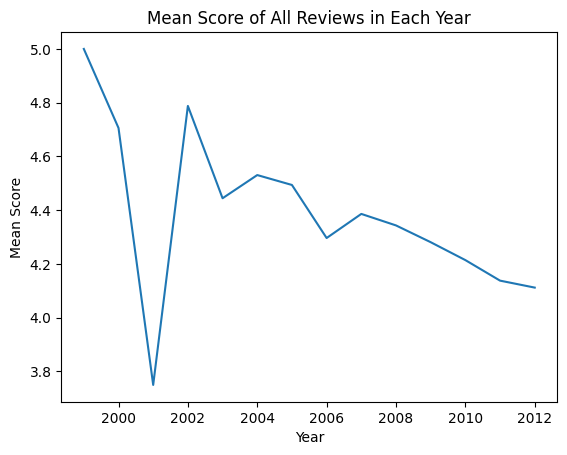

In [ ]:
 import matplotlib.pyplot as plt
 import pandas as pd

df1['Time'] = pd.to_datetime(df1['Time'], unit='s').dt.year

score_counts = df1.groupby(['Time', 'Score'])['Score'].count()
print(score_counts)

mean_score = df1.groupby('Time')['Score'].mean()

plt.plot(mean_score.index, mean_score.values)
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.title('Mean Score of All Reviews in Each Year')
plt.show()

Time
1999         4
2000        17
2001         8
2002        33
2003        99
2004       439
2005      1059
2006      4722
2007     15752
2008     23100
2009     37866
2010     57967
2011    113428
2012    139085
Name: UserId, dtype: int64


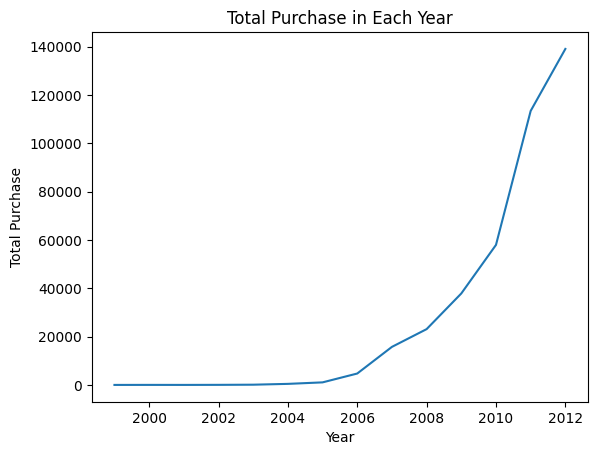

In [ ]:
total_purchase_counts = df1.groupby('Time')['UserId'].count()
print(total_purchase_counts)

plt.plot(total_purchase_counts.index, total_purchase_counts.values)
plt.xlabel('Year')
plt.ylabel('Total Purchase')
plt.title('Total Purchase in Each Year')
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


# Define the lambda function to map the scores to sentiment
def map_sentiment(score, text, helpfulness_numerator, helpfulness_denominator):
    if score > 3 and helpfulness_numerator > 0 and helpfulness_denominator == helpfulness_numerator:
        return 'positive'
    elif score < 3 and helpfulness_numerator == 0 and helpfulness_denominator != helpfulness_numerator:
        return 'negative'
    elif score > 3 and helpfulness_numerator == 0 and helpfulness_denominator == helpfulness_numerator:
        return 'positive'
    elif score < 3 and helpfulness_numerator == 0 and helpfulness_denominator == helpfulness_numerator:
        return 'negative'
    elif score == 3:
        sentiment_scores = sia.polarity_scores(text)
        if helpfulness_numerator > 0 and helpfulness_denominator == helpfulness_numerator and sentiment_scores['compound'] >= 0.7:
            return 'positive'
        elif helpfulness_numerator == 0 and helpfulness_denominator != helpfulness_numerator and sentiment_scores['compound'] < 0.7:
            return 'negative'
        elif helpfulness_numerator == 0 and helpfulness_denominator == helpfulness_numerator and sentiment_scores['compound'] >= 0.7:
            return 'positive'
        elif score < 3 and helpfulness_numerator == 0 and helpfulness_denominator == helpfulness_numerator and sentiment_scores['compound'] < 0.7:
            return 'negative'
        else:
            return 'positive' # default to positive sentiment for score of 3 if none of the above conditions are met
    else:
        return 'negative' # default to neutral sentiment for scores less than 3


In [ ]:
# Apply the map_sentiment function to the Score, CleanedText, HelpfulnessNumerator, and HelpfulnessDenominator columns and store the result in a new column called 'Sentiment'
sentiments = []
for score, text, helpfulness_numerator, helpfulness_denominator in tqdm(zip(df1['Score'], df1['Text'], df1['HelpfulnessNumerator'], df1['HelpfulnessDenominator'])):
    sentiment = map_sentiment(score, text, helpfulness_numerator, helpfulness_denominator)
    sentiments.append(sentiment)


df1['Sentiment'] = sentiments
df1.head()


393579it [00:22, 17480.34it/s]


Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score  Time  \
0                     1                       1      5  2011   
1                     0                       0      1  2012   
2                     1                       1      4  2008   
3                     3                       3      2  2011   
4                     0                       0      5  2012   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

                             ProductURL  \
0  https://www.amazon.com/dp/B001E4KFG0   
1  https://www.amazon.com/dp/B00813GRG4   
2  https://www.amazon.com/dp/B000LQOCH0   
3  https://www.amazon.com/dp/B000UA0QIQ   
4  https://www.amazon.com/dp/B006K2ZZ7K   

                                         CleanedText Sentiment  
0  bought sever vital can dog food product found ...  positive  
1  product arriv label jumbo salt peanut actual s...  negative  
2  confect around pillowi citrus gelatin nut case...  positive  
3  look secret ingredi robitussin believ found go...  negative  
4  great taffi great wide assort yummi deliveri t...  positive

In [ ]:
# Create new columns 'GoodStore' and 'BadStore'
df1['GoodStore'] = df1['Sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
df1['BadStore'] = df1['Sentiment'].apply(lambda x: 1 if x == 'negative' else 0)
df1.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score  Time  \
0                     1                       1      5  2011   
1                     0                       0      1  2012   
2                     1                       1      4  2008   
3                     3                       3      2  2011   
4                     0                       0      5  2012   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

                             ProductURL  \
0  https://www.amazon.com/dp/B001E4KFG0   
1  https://www.amazon.com/dp/B00813GRG4   
2  https://www.amazon.com/dp/B000LQOCH0   
3  https://www.amazon.com/dp/B000UA0QIQ   
4  https://www.amazon.com/dp/B006K2ZZ7K   

                                         CleanedText Sentiment  GoodStore  \
0  bought sever vital can dog food product found ...  positive          1   
1  product arriv label jumbo salt peanut actual s...  negative          0   
2  confect around pillowi citrus gelatin nut case...  positive          1   
3  look secret ingredi robitussin believ found go...  negative          0   
4  great taffi great wide assort yummi deliveri t...  positive          1   

   BadStore  
0         0  
1         1  
2         0  
3         1  
4         0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Specify the .csv file path
csv_file_path = '/content/drive/MyDrive/Study/NTUST/Big Data Analytic/Me/MidTerm/Sentiment.csv'  # Update with your actual file path
import pandas as pd
# Read the .csv file into a DataFrame
df2 = pd.read_csv(csv_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORT DATASET FROM MONGODB

In [ ]:
score_sentiment_df2 = df2[['ProductId', 'Score','HelpfulnessNumerator','HelpfulnessDenominator','Sentiment']]
score_sentiment_df2.head()

ProductId  Score  HelpfulnessNumerator  HelpfulnessDenominator Sentiment
0  B001E4KFG0      5                     1                       1  positive
1  B00813GRG4      1                     0                       0  negative
2  B000LQOCH0      4                     1                       1  positive
3  B000UA0QIQ      2                     3                       3  negative
4  B006K2ZZ7K      5                     0                       0  positive

In [ ]:
# create a dictionary to store the sentiment counts for each product
sentiment_dict = {}
for product in score_sentiment_df2['ProductId'].unique():
    sentiment_dict[product] = {
        'negative': 0,
        'positive': 0
    }

# iterate over each row in the score_sentiment_df and increment the corresponding sentiment count
for index, row in score_sentiment_df2.iterrows():
    sentiment_dict[row['ProductId']][row['Sentiment']] += 1

# create a new dataframe from the sentiment_dict
sentiment_counts_df2 = pd.DataFrame.from_dict(sentiment_dict, orient='index')

# add the ProductId column
sentiment_counts_df2.index.name = 'ProductId'

# display the first 10 rows
sentiment_counts_df2.head(10)

negative  positive
ProductId                     
B001E4KFG0         0         1
B00813GRG4         1         0
B000LQOCH0         0         1
B000UA0QIQ         1         0
B006K2ZZ7K         0         4
B000E7L2R4         0         1
B00171APVA         0         1
B0001PB9FE         0         1
B0009XLVG0         1         1
B001GVISJM         5        10

In [ ]:
#nomer 5 most reviewed for generaal
sentiment_counts_df2 = sentiment_counts_df2.sort_values(['positive', 'negative'], ascending=[False, True])
sentiment_counts_df2

negative  positive
ProductId                     
B002QWP89S        57       573
B003B3OOPA        97       525
B000NMJWZO        26       516
B001EO5Q64        78       487
B0013NUGDE        92       465
...              ...       ...
B000KS3L4E        13         0
B0032GREWQ        16         0
B000G1EO0A        20         0
B000FIDLNU        24         0
B000NY8OLK        37         0

[59424 rows x 2 columns]

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud


# Filter the dataframe to only include reviews for the most reviewed product
df_most = df2[df2['ProductId'] == "B002QWP89S"]

# Drop rows with missing values in the 'Cleanedtext' column
df2.dropna(subset=['CleanedText'], inplace=True)

# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['CleanedText'])

# Calculate the cosine similarity between all pairs of reviews
cosine_similarities = cosine_similarity(tfidf_matrix)

# Create a dictionary with words and their corresponding frequencies
word_frequencies = {}
for i in range(len(cosine_similarities)):
    for j in range(i+1, len(cosine_similarities)):
        similarity_score = cosine_similarities[i][j]
        if similarity_score > 0.5:
            review1 = df2.iloc[i]['CleanedText']
            review2 = df2.iloc[j]['CleanedText']
            for word in review1.split():
                word_frequencies[word] = word_frequencies.get(word, 0) + 1
            for word in review2.split():
                word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Create a word cloud from the word frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_frequencies)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Filter the dataframe to only include reviews for the most reviewed product
df_most = df2[df2['ProductId'] == "B002QWP89S"]

# Drop rows with missing values in the 'Cleanedtext' column
df_most.dropna(subset=['CleanedText'], inplace=True)

# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_most['CleanedText'])

# Perform KMeans clustering on the tfidf_matrix
kmeans = KMeans(n_clusters=5, random_state=42).fit(tfidf_matrix)

# Print the cluster centers
print("Cluster centers:")
print(tfidf_vectorizer.inverse_transform(kmeans.cluster_centers_))


Cluster centers:
[array(['abl', 'absolut', 'absorb', 'actual', 'addict', 'adjunct', 'adopt',
       'ador', 'adult', 'advantag', 'advertis', 'advic', 'affect',
       'afford', 'afterward', 'aggress', 'ago', 'akc', 'aliento',
       'allergi', 'almost', 'along', 'alot', 'alreadi', 'also', 'altern',
       'alway', 'amaz', 'amazon', 'amount', 'amt', 'angri', 'anim',
       'annual', 'anoth', 'anymor', 'anyth', 'appear', 'appet', 'aprox',
       'area', 'arent', 'around', 'arriv', 'ask', 'asthma', 'ate',
       'attempt', 'august', 'aussi', 'author', 'avail', 'avoid', 'aw',
       'awar', 'away', 'awesom', 'babi', 'back', 'bad', 'bag', 'bargain',
       'base', 'basic', 'beacaus', 'becam', 'becom', 'begg', 'believ',
       'belov', 'bend', 'besid', 'best', 'better', 'bewar', 'big',
       'bigger', 'bile', 'bill', 'billi', 'bisulfit', 'bit', 'bite',
       'black', 'blockag', 'blow', 'bob', 'boil', 'bone', 'boon',
       'border', 'bother', 'bought', 'bowel', 'box', 'boy', 'brandi',
    

<ipython-input-3-9e5e0b9cfcd7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most.dropna(subset=['CleanedText'], inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-4-b18f69ac69f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most.dropna(subset=['CleanedText'], inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


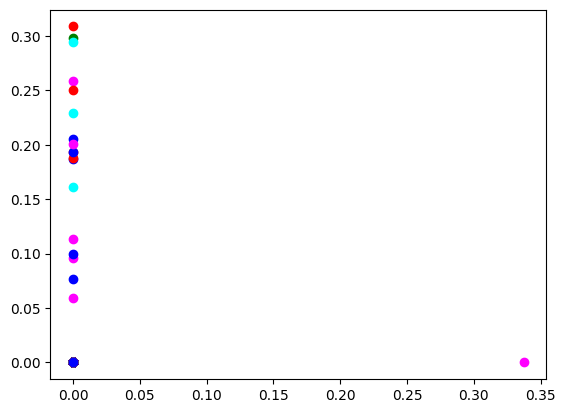

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Filter the dataframe to only include reviews for the most reviewed product
df_most = df2[df2['ProductId'] == "B002QWP89S"]

# Drop rows with missing values in the 'Cleanedtext' column
df_most.dropna(subset=['CleanedText'], inplace=True)

# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_most['CleanedText'])

# Perform KMeans clustering on the tfidf_matrix
kmeans = KMeans(n_clusters=5, random_state=42).fit(tfidf_matrix)

# Visualize the clusters in a scatter plot
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
for i in range(len(kmeans.labels_)):
    plt.scatter(tfidf_matrix[i, 0], tfidf_matrix[i, 1], c=colors[kmeans.labels_[i]])
plt.show()


<ipython-input-20-6916e3743204>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most['PCA1'] = X_pca[:, 0]
<ipython-input-20-6916e3743204>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most['PCA2'] = X_pca[:, 1]
<ipython-input-20-6916e3743204>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

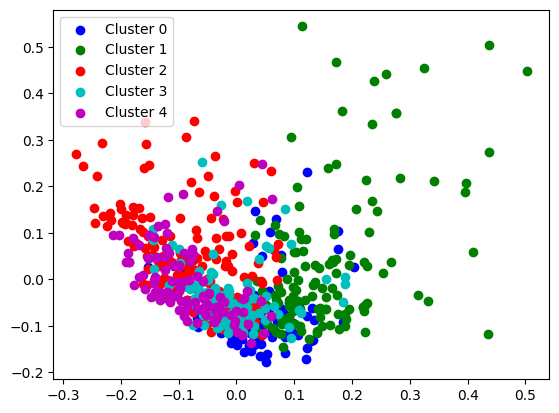

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
df_most = df2[df2['ProductId'] == "B002QWP89S"]

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_most['CleanedText'])

# Perform PCA on the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
df_most['PCA1'] = X_pca[:, 0]
df_most['PCA2'] = X_pca[:, 1]

# Perform clustering using KMeans
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

# Add the predicted clusters to the dataframe
df_most['cluster'] = model.labels_

# Visualize the clustering result
colors = ['b', 'g', 'r', 'c', 'm']
for i in range(k):
    cluster_df = df_most[df_most['cluster'] == i]
    plt.scatter(cluster_df['PCA1'], cluster_df['PCA2'], color=colors[i], label='Cluster %d' % i)

plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
import string

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)


def preprocess(text):
  return nltk.word_tokenize(text.lower().translate(remove_punctuation_map))

In [ ]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=preprocess, stop_words=eng_stopwords)

In [ ]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=preprocess, stop_words=eng_stopwords)
def compute_similarity(text1, text2):
  tfidf = vectorizer.fit_transform([text1, text2])

  return ((tfidf * tfidf.T).toarray())[5,6]

# Example usage
a = df_most['CleanedText'][5]
b = df_most['CleanedText'][6]
similarity_score = compute_similarity(a, b)
print(f"The similarity score between texts a and b is {similarity_score:.2f}")


KeyError: ignored

In [ ]:
# Filter the dataframe to only include reviews for the most reviewed product

df_most = df2[df2['ProductId'] == "B002QWP89S"]

# Split the reviews into positive and negative dataframes
df_most_pos = df_most[df_most['Sentiment'] == 'positive']
df_most_neg = df_most[df_most['Sentiment'] == 'negative']

M = np.zeros((df_most_pos.shape[0], df_most_pos.shape[0])) # we create a 30x30 matrix to contain the results of article_i with article_j


for i, row in tqdm(df_most_pos.iterrows(), total=df_most_pos.shape[0], desc='1st level'): # we define i
	for j, next_row in df_most_pos.iterrows(): # we define j
		M[i, j] = compute_similarity(row.CleanedText, next_row.CleanedText) # we populate the matrix with the results

1st level:   0%|          | 0/573 [00:00<?, ?it/s]


IndexError: ignored

In [ ]:
import numpy as np
from tqdm import tqdm
import numpy as np
from tqdm import tqdm

# Define a function to compute similarity between two texts
def compute_similarity(text1, text2):
    # Tokenize the text and remove stop words
    tokens1 = [token for token in text1.lower().split() if token not in stopwords.words('english')]
    tokens2 = [token for token in text2.lower().split() if token not in stopwords.words('english')]

    # Create a set of unique tokens from the two texts
    unique_tokens = set(tokens1 + tokens2)

    # Create a bag-of-words vector for each text
    vector1 = [tokens1.count(token) for token in unique_tokens]
    vector2 = [tokens2.count(token) for token in unique_tokens]

    # Calculate the cosine similarity score
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    similarity_score = dot_product / (norm1 * norm2)

    return similarity_score

M = np.zeros((df_most.shape[0], df_most.shape[0])) # create a matrix to contain the results of article_i with article_j

for i, row in tqdm(df_most.iterrows(), total=df_most.shape[0], desc='1st level'): # define i
    for j, next_row in df_most.iterrows(): # define j
        if j >= i: # Only compute similarity score for j >= i
            M[i, j] = compute_similarity(row.CleanedText, next_row.CleanedText) # populate the matrix with the results
            M[j, i] = M[i, j] # Set the symmetric element in the matrix

# Define a function to compute similarity between two texts
def compute_similarity(text1, text2):
    # Implementation of similarity calculation
    return similarity_score

M = np.zeros((df_most.shape[0], df_most.shape[0])) # create a matrix to contain the results of article_i with article_j

for i, row in tqdm(df_most.iterrows(), total=df_most.shape[0], desc='1st level'): # define i
    for j, next_row in df_most.iterrows(): # define j
        if j >= i: # Only compute similarity score for j >= i
            M[i, j] = compute_similarity(row.CleanedText, next_row.CleanedText) # populate the matrix with the results
            M[j, i] = M[i, j] # Set the symmetric element in the matrix


1st level:   0%|          | 0/630 [00:00<?, ?it/s]


IndexError: ignored

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

nltk.download('stopwords')
eng_stopwords = stopwords.words('english')


# Load the dataset
df_most_pos = df2[(df2['ProductId'] == "B002QWP89S") & (df2['Sentiment'] == 'positive') & (df2['Score'] == 5)]



# Filter rows where Score equals 5
df_most_pos_5 = df_most_pos[df_most_pos['Score'] == 5]

# Get the first 30 rows
df_most_pos_5 = df_most_pos_5.head(30)


remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def preprocess(text):
  return nltk.word_tokenize(text.lower().translate(remove_punctuation_map))

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=preprocess, stop_words=eng_stopwords)

def compute_similarity(a, b):
  tfidf = vectorizer.fit_transform([a, b])
  return ((tfidf * tfidf.T).toarray())[0,1]

M = np.zeros((df_most_pos_5.shape[0], df_most_pos_5.shape[0])) # we create a matrix to contain the results of row_i with row_j

for i, row in tqdm(df_most_pos_5.iterrows(), total=df_most_pos_5.shape[0], desc='1st level'): # we define i
    for j, next_row in df_most_pos_5.iterrows(): # we define j
        M[i, j] = compute_similarity(row.Text, next_row.Text) # we populate the matrix with the results

similarity_df = pd.DataFrame(M, columns=None, index=None)
mask = np.triu(np.ones_like(similarity_df)) # we apply a mask to remove the top of the heatmap

# let's create the viz
plt.figure(figsize=(12, 12))
sns.heatmap(
    similarity_df,
    square=True,
    annot=True,
    robust=True,
    fmt='.2f',
    annot_kws={'size': 7, 'fontweight': 'bold'},
    yticklabels=similarity_df.columns,
    xticklabels=similarity_df.columns,
    cmap="YlGnBu",
    mask=mask
)

plt.title('Similarity heatmap', fontdict={'fontsize': 24})
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
1st level:   0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn(
1st level:   0%|          | 0/30 [00:00<?, ?it/s]


IndexError: ignored

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Load the dataset
df_most_pos = df2[(df2['ProductId'] == "B002QWP89S") & (df2['Sentiment'] == 'positive') & (df2['Score'] == 5)][['ProductId', 'Sentiment', 'Score', 'CleanedText']]



# Compute the TF-IDF matrix for the Text column
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_most_pos['CleanedText'])

# Compute the pairwise cosine similarity between each pair of rows
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create a heatmap to visualize the similarity scores
sns.heatmap(similarity_matrix, annot=True)


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fbd7c4ed000> (for post_execute):


KeyboardInterrupt: ignored

<Axes: >

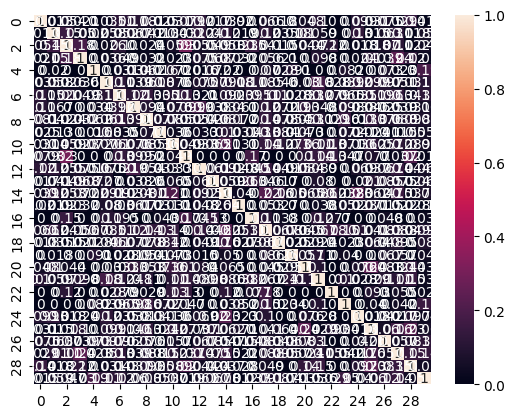

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Load the dataset
df_most_pos = df2[(df2['ProductId'] == "B002QWP89S") & (df2['Sentiment'] == 'positive') & (df2['Score'] == 5)][['ProductId', 'Sentiment', 'Score', 'CleanedText']].head(30)

# Compute the TF-IDF matrix for the Text column
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_most_pos['CleanedText'])

# Compute the pairwise cosine similarity between each pair of rows
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create a heatmap to visualize the similarity scores
sns.heatmap(similarity_matrix, annot=True)


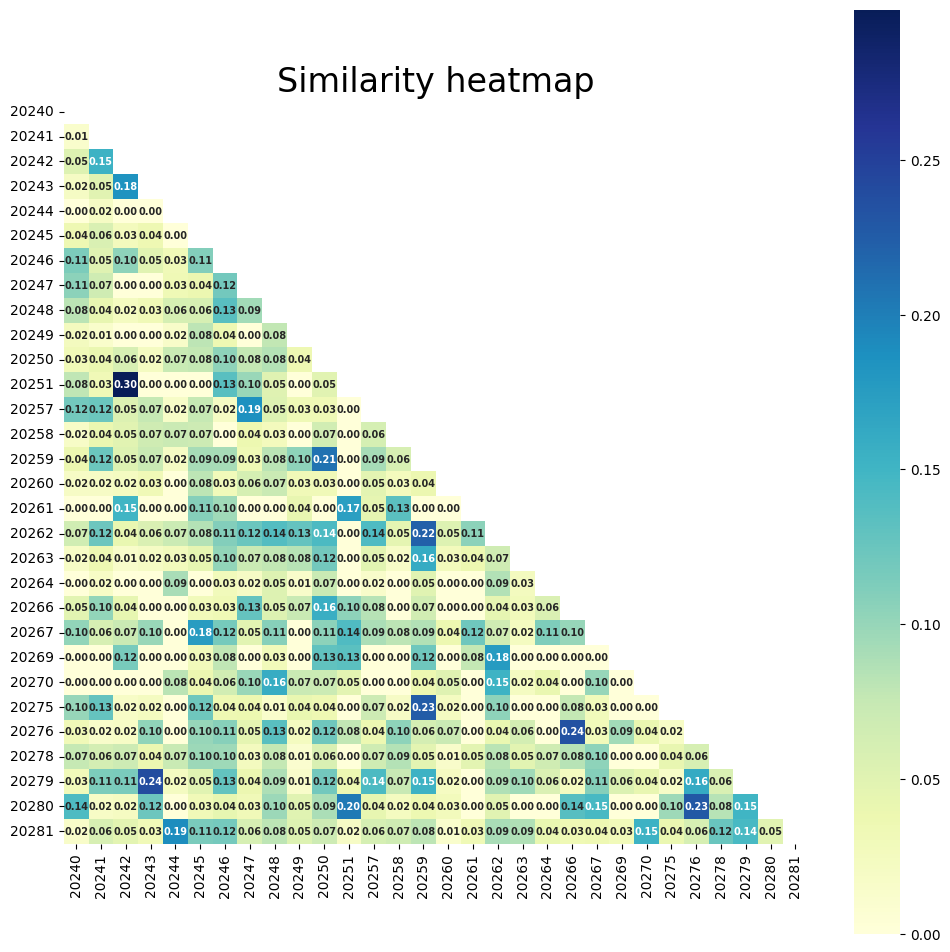

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
df_most_pos = df2[(df2['ProductId'] == "B002QWP89S") & (df2['Sentiment'] == 'positive') & (df2['Score'] == 5)][['ProductId', 'Sentiment', 'Score', 'CleanedText']].head(30)

# Compute the TF-IDF matrix for the Text column
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_most_pos['CleanedText'])

# Compute the pairwise cosine similarity between each pair of rows
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create a heatmap to visualize the similarity scores
mask = np.zeros_like(similarity_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 12))
sns.heatmap(similarity_matrix,
            square=True,
            annot=True,
            fmt='.2f',
            annot_kws={'size': 7, 'fontweight': 'bold'},
            yticklabels=df_most_pos.index,
            xticklabels=df_most_pos.index,
            cmap="YlGnBu",
            mask=mask)

plt.title('Similarity heatmap', fontdict={'fontsize': 24})
plt.show()


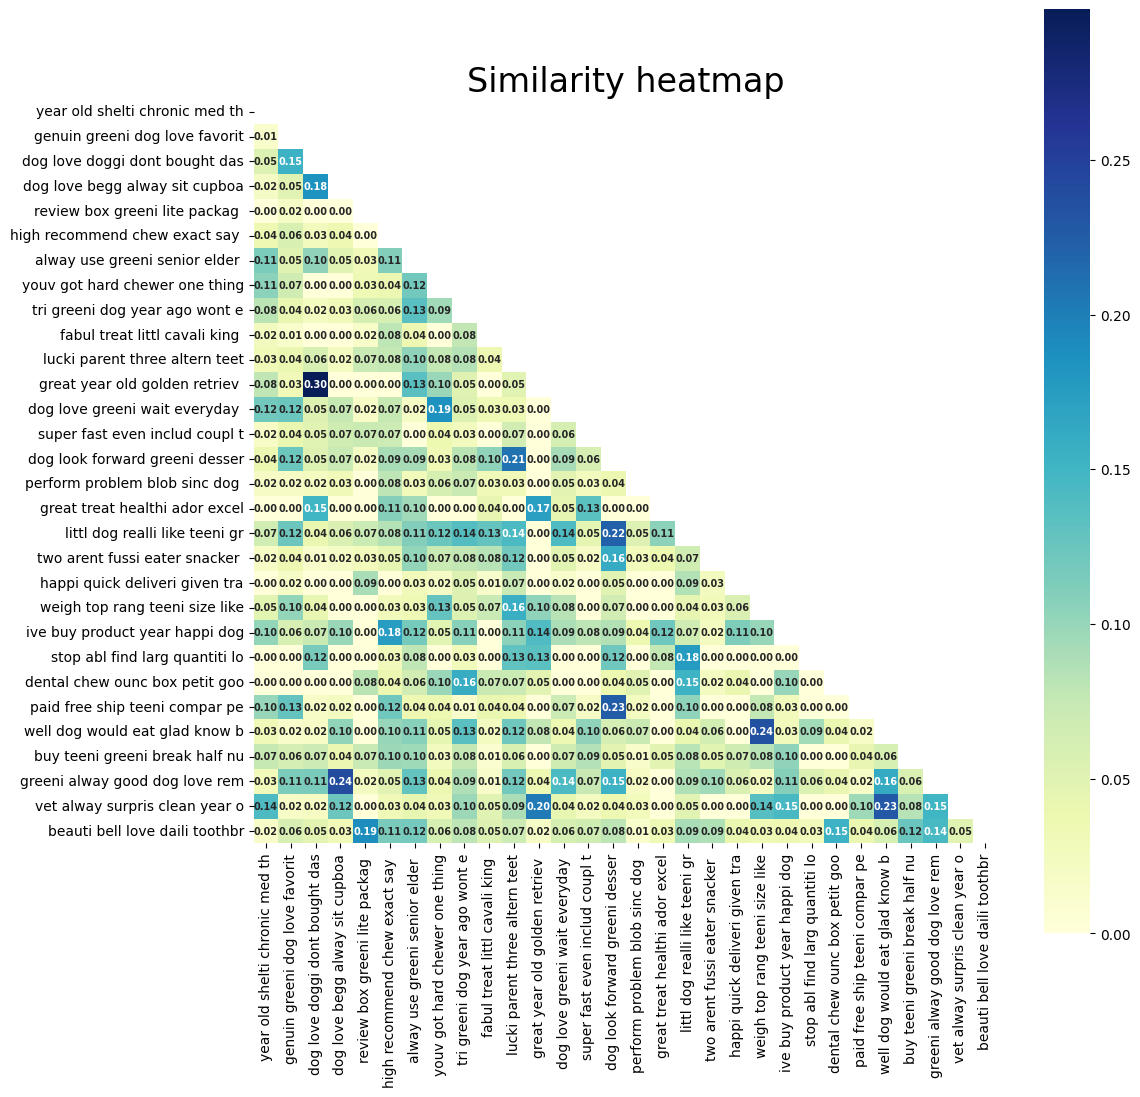

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
df_most_pos = df2[(df2['ProductId'] == "B002QWP89S") & (df2['Sentiment'] == 'positive') & (df2['Score'] == 5)][['ProductId', 'Sentiment', 'Score', 'CleanedText']].head(30)

# Compute the TF-IDF matrix for the Text column
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_most_pos['CleanedText'])

# Compute the pairwise cosine similarity between each pair of rows
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create a heatmap to visualize the similarity scores
mask = np.zeros_like(similarity_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 12))
sns.heatmap(similarity_matrix,
            square=True,
            annot=True,
            fmt='.2f',
            annot_kws={'size': 7, 'fontweight': 'bold'},
            yticklabels=df_most_pos['CleanedText'].str[:30],
            xticklabels=df_most_pos['CleanedText'].str[:30],
            cmap="YlGnBu",
            mask=mask)

plt.title('Similarity heatmap', fontdict={'fontsize': 24})
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

nltk.download('stopwords')
eng_stopwords = stopwords.words('english')

# Specify the .csv file path
csv_file_path = '/content/drive/MyDrive/Study/NTUST/Big Data Analytic/Me/MidTerm/Reviews_withURL.csv'  # Update with your actual file path

# Read the .csv file into a DataFrame
df = pd.read_csv(csv_file_path)

# Load the dataset
df_most = df[df['ProductId'] == "B002QWP89S"]


# Split the reviews into positive and negative dataframes
df_most_pos = df_most[df_most['Sentiment'] == 'positive']
df_most_neg = df_most[df_most['Sentiment'] == 'negative']

remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def preprocess(text):
  return nltk.word_tokenize(text.lower().translate(remove_punctuation_map))

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=preprocess, stop_words=eng_stopwords)

def compute_similarity(a, b):
  tfidf = vectorizer.fit_transform([a, b])
  return ((tfidf * tfidf.T).toarray())[0,1]

M = np.zeros((df_most.shape[0], df_most.shape[0])) # we create a matrix to contain the results of row_i with row_j

for i, row in tqdm(df_most.iterrows(), total=df_most.shape[0], desc='1st level'): # we define i
    for j, next_row in df_most.iterrows(): # we define j
        M[i, j] = compute_similarity(row.Text, next_row.Text) # we populate the matrix with the results

similarity_df = pd.DataFrame(M, columns=None, index=None)
mask = np.triu(np.ones_like(similarity_df)) # we apply a mask to remove the top of the heatmap

# let's create the viz
plt.figure(figsize=(12, 12))
sns.heatmap(
    similarity_df,
    square=True,
    annot=True,
    robust=True,
    fmt='.2f',
    annot_kws={'size': 7, 'fontweight': 'bold'},
    yticklabels=similarity_df.columns,
    xticklabels=similarity_df.columns,
    cmap="YlGnBu",
    mask=mask
)

plt.title('Similarity heatmap', fontdict={'fontsize': 24})
plt.show()


In [ ]:
#nomer 5 --> most reviewed for good store
good_store = sentiment_counts_df2[sentiment_counts_df2['positive']>sentiment_counts_df2['negative']]
good_store.sort_values(['positive'], ascending=False)
print(good_store.head(5))
print(good_store.tail(5))

            negative  positive
ProductId                     
B002QWP89S        57       573
B003B3OOPA        97       525
B000NMJWZO        26       516
B001EO5Q64        78       487
B0013NUGDE        92       465
            negative  positive
ProductId                     
B001BDB2OS         0         1
B003L7Z2KW         0         1
B004VRJV8K         0         1
B000FTE4S0         0         1
B0041CBI8Q         0         1


In [ ]:
#nomer 5 --> most review for bad store
bad_store = sentiment_counts_df2[sentiment_counts_df2['negative']>sentiment_counts_df2['positive']]
bad_store.sort_values(['negative'], ascending=False)
print(bad_store.head())
print(bad_store.tail())

            negative  positive
ProductId                     
B007I7Z3Z0       232       128
B0045XE32E       165       117
B007RTR9DS        94        92
B004Q3LBTG       103        87
B000FI4O90       103        87
            negative  positive
ProductId                     
B000KS3L4E        13         0
B0032GREWQ        16         0
B000G1EO0A        20         0
B000FIDLNU        24         0
B000NY8OLK        37         0


Product Rank Based on Total Purchase

In [ ]:
import warnings
warnings.filterwarnings("ignore")

good_store['Total Purchase'] = good_store['positive'] + good_store['negative']
good_store.head(10)

negative  positive  Total Purchase
ProductId                                     
B002QWP89S        57       573             630
B003B3OOPA        97       525             622
B000NMJWZO        26       516             542
B001EO5Q64        78       487             565
B0013NUGDE        92       465             557
B000UBD88A        79       463             542
B000PDY3P0        79       407             486
B007TJGY46        65       391             456
B002LANN56        85       379             464
B000KV61FC       180       376             556

PIE CHART FOR GOOD STORE AND BAD STORE

| Store Type        |   Total Count |
|-------------------+---------------|
| Total Stores      |         55362 |
| Total Good Stores |         46301 |
| Total Bad Stores  |          9061 |


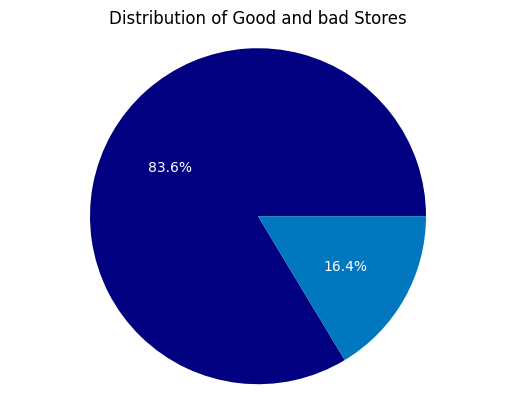

In [ ]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Calculate the total number of good and bad stores
total_good_stores = len(good_store)
total_bad_stores = len(bad_store)
total_stores = total_good_stores + total_bad_stores
# Create the table
table = [['Total Stores', total_stores], ['Total Good Stores', total_good_stores], ['Total Bad Stores', total_bad_stores]]
# Print the table
print(tabulate(table, headers=['Store Type', 'Total Count'], tablefmt='orgtbl'))


# Create a pie chart
sizes = [total_good_stores, total_bad_stores]
colors = ['#000080', '#0077be']
plt.pie(sizes, colors=colors, autopct='%1.1f%%', textprops={'color': 'white'})
plt.axis('equal')
plt.title('Distribution of Good and bad Stores')
plt.show()


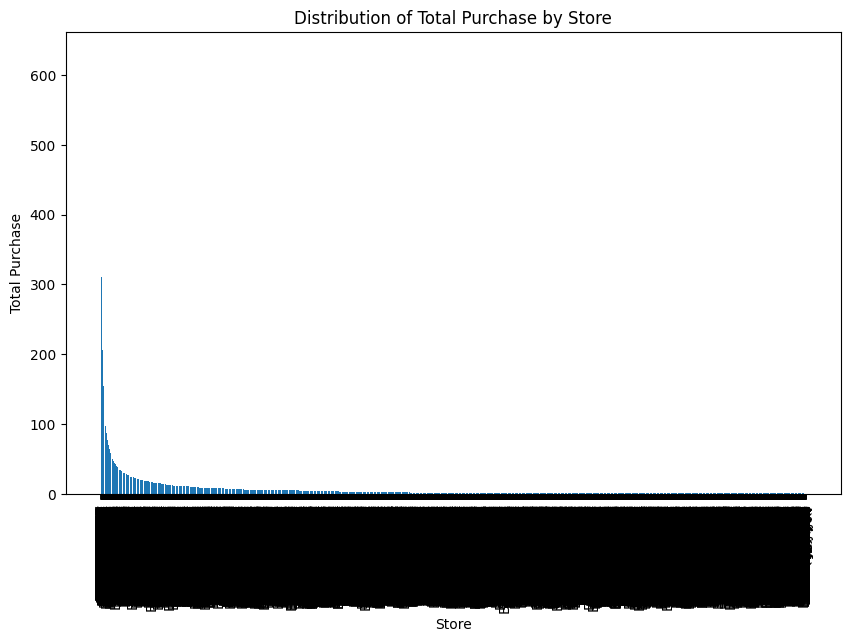

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'good_store' is your DataFrame
# Sort the DataFrame by 'Total Purchase' in descending order
good_store = good_store.sort_values('Total Purchase', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6)) # Set the figure size
plt.bar(good_store.index, good_store['Total Purchase']) # Set the x-axis and y-axis values
plt.xlabel('Store') # Set the x-axis label
plt.ylabel('Total Purchase') # Set the y-axis label
plt.title('Distribution of Total Purchase by Store') # Set the title of the chart
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show() # Show the bar chart


GOOD STORE WITH LOWEST PURCHASE

In [ ]:
good_store_sorted = good_store.sort_values(by='Total Purchase', ascending=True)
good_store_sorted.head()

negative  positive  Total Purchase
ProductId                                     
B001LR2CU2         0         1               1
B0035MNTNK         0         1               1
B000KOUOHU         0         1               1
B000H7K114         0         1               1
B006T7TKZO         0         1               1

In [ ]:
# Define the categories and corresponding keywords
categories = {
    'Health & Beauty': 'medicine|diet|fitness|lips|fragrance',
    'Food & Beverage': 'tasti|tea|instant|cookie|coffee',
    'Electronics': 'cellphones|smart|digital|tech|portable',
    'Pet Food': 'dog|cat|kitten|animal|rabbit',
    'Kitchen': 'kitchen|dining|blender|colander|tablecloth'
}

# Iterate over the categories and keywords to process the data and create dataframes
for category, keywords in categories.items():
    # Filter the data for the category
    df_category = df2[df2['Text'].str.contains(keywords, case=False)]

    # Show the number of rows
    print(f"Number of rows for {category}: {df_category.shape[0]}")

    # Create a dictionary to store the sentiment counts for each product
    sentiment_dict = {}
    for product in df_category['ProductId'].unique():
        sentiment_dict[product] = {
            'negative': 0,
            'positive': 0
        }

    # Iterate over each row in the data and increment the corresponding sentiment count
    for index, row in df_category.iterrows():
        sentiment_dict[row['ProductId']][row['Sentiment']] += 1

    # Create a new dataframe from the sentiment_dict
    df_category = pd.DataFrame.from_dict(sentiment_dict, orient='index')

    # Add the ProductId column
    df_category.index.name = 'ProductId'

    # Add a new column for the total number of purchases
    df_category['Total Purchase'] = df_category['negative'] + df_category['positive']

    # Sort the data by the lowest score in the positive column
    df_category = df_category[df_category['positive'] > df_category['negative']].sort_values(by='positive').head()

    # Display the data
    print(df_category)


Number of rows for Health & Beauty: 16161
            negative  positive  Total Purchase
ProductId                                     
B005DUM9UQ         0         1               1
B002AMZ1EG         0         1               1
B004N5DHDU         0         1               1
B00513J4T4         0         1               1
B00028LVKS         0         1               1
Number of rows for Food & Beverage: 119466
            negative  positive  Total Purchase
ProductId                                     
B00144C10S         0         1               1
B00099XK6I         0         1               1
B003JU9BBW         0         1               1
B002ATCFX4         0         1               1
B002SJUNU8         0         1               1
Number of rows for Electronics: 3187
            negative  positive  Total Purchase
ProductId                                     
B0037LW78C         0         1               1
B000X1GFN2         0         1               1
B000LJQAIG         0         1  

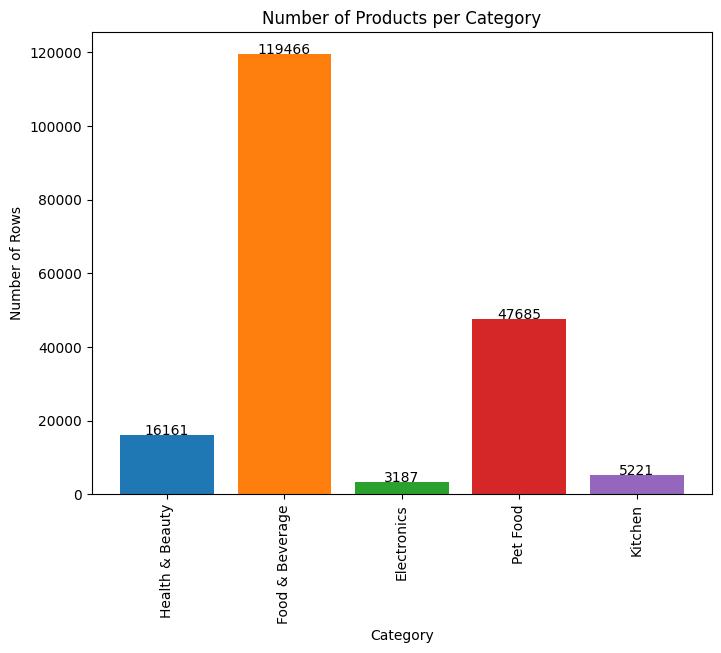

In [ ]:


# Define the categories and corresponding keywords
categories = {
    'Health & Beauty': 'medicine|diet|fitness|lips|fragrance',
    'Food & Beverage': 'tasti|tea|instant|cookie|coffee',
    'Electronics': 'cellphones|smart|digital|tech|portable',
    'Pet Food': 'dog|cat|kitten|animal|rabbit',
    'Kitchen': 'kitchen|dining|blender|colander|tablecloth'
}

# Create lists to store the number of rows and category names
num_rows = []
cat_names = []

# Create a figure object and set its size
fig = plt.figure(figsize=(8, 6))

# Iterate over the categories and keywords to process the data and create dataframes
for category, keywords in categories.items():
    # Filter the data for the category
    df_category = df2[df2['Text'].str.contains(keywords, case=False)]

    # Get the number of rows
    num = df_category.shape[0]

    # Add the number of rows and category name to the lists
    num_rows.append(num)
    cat_names.append(category)

    # Create a bar for the category with the number of rows as the label
    plt.bar(category, num, label=num)

# Set the chart title and axis labels
plt.title('Number of Products per Category')
plt.xlabel('Category')
plt.ylabel('Number of Rows')

# Show the number of rows above each bar
for i in range(len(num_rows)):
    plt.text(i, num_rows[i] + 50, num_rows[i], ha='center', fontsize=10)

# Rotate x-axis labels 90 degrees
plt.xticks(rotation=90)

# Save the plot as a jpg file in your Google Drive
plt.savefig('/content/drive/My Drive/num_rows_per_category.jpg')

# Show the plot
plt.show()


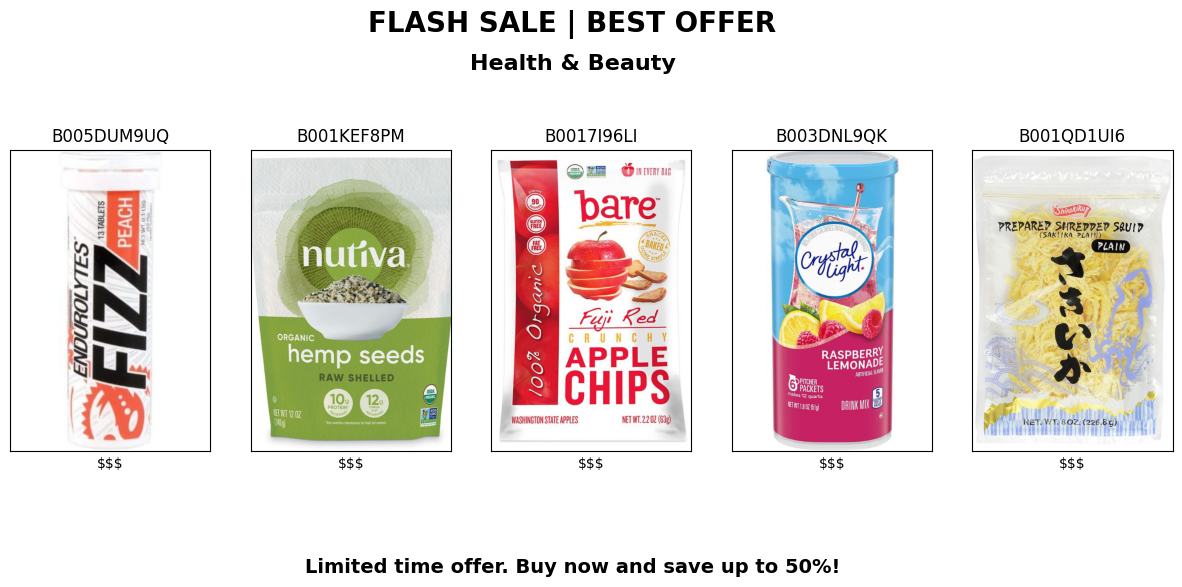

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Define image file paths and titles
image_files = ['/content/drive/MyDrive/Bigdata/1.jpg',
               '/content/drive/MyDrive/Bigdata/2.jpg',
               '/content/drive/MyDrive/Bigdata/3.jpg',
               '/content/drive/MyDrive/Bigdata/4.jpg',
               '/content/drive/MyDrive/Bigdata/5.jpg']
titles = ['B005DUM9UQ', 'B001KEF8PM', 'B0017I96LI', 'B003DNL9QK', 'B001QD1UI6']


# Create figure and axes objects
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15,6))

# Add title and text to figure
fig.suptitle('FLASH SALE | BEST OFFER', fontsize=20, fontweight='bold')
fig.text(0.5, 0.05, 'Limited time offer. Buy now and save up to 50%!',
         ha='center', va='center', fontsize=14, fontweight='bold')
fig.text(0.5, 0.88, 'Health & Beauty', fontsize=16, fontweight='bold', ha='center')

# Load images and plot them on axes
for i, image_file in enumerate(image_files):
    img = Image.open(image_file)
    axs[i].imshow(img)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('$$$')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_ylabel('')

# Display plot
plt.show()
fig.savefig('/content/drive/MyDrive/Bigdata/flash_sale1.png')

FIND HIGHEST TOTAL PURCHASE IN BAD STORE AND PICK 5 PRODUCT AT THE HIGHEST PURCHASE

In [ ]:
import warnings
warnings.filterwarnings("ignore")

bad_store['Total Purchase'] = bad_store['positive'] + bad_store['negative']
bad_store.head()

negative  positive  Total Purchase
ProductId                                     
B007I7Z3Z0       232       128             360
B0045XE32E       165       117             282
B007RTR9DS        94        92             186
B004Q3LBTG       103        87             190
B000FI4O90       103        87             190

WORD CLOUD SCORE = 1 && 2 OF EACH PRODUCT

ITERATE BAD PRODUCT

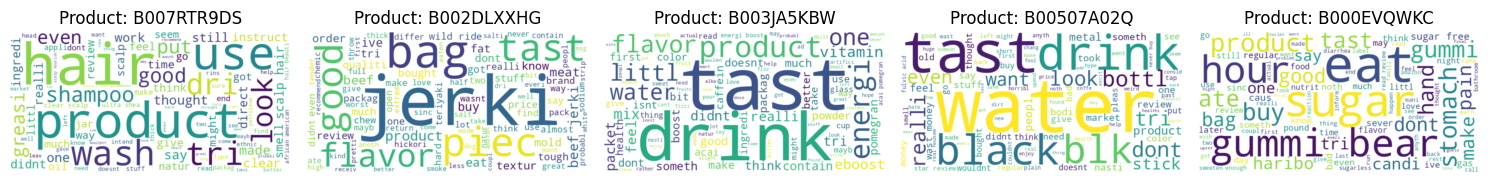

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# List of product IDs to generate word clouds for
product_ids = ["B007RTR9DS", "B002DLXXHG", "B003JA5KBW", "B00507A02Q", "B000EVQWKC"]

# Scores to filter the data on
scores = [1, 2]

# Define the subplot layout
num_rows = 1
num_cols = 5

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over each product ID and generate word cloud
for i, product_id in enumerate(product_ids):
    # Filter the data based on product and score
    filtered_data = df2[(df2["ProductId"] == product_id) & (df2["Score"].isin(scores))]

    # Concatenate the filtered "CleanedText" column into a single string
    text = " ".join(filtered_data["CleanedText"].tolist())

    # Create a WordCloud object with desired settings
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(text)

    # Plot the word cloud on the corresponding subplot
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Product: {product_id}")

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


WORDCLOUD -- ASPECT ANALYSIS

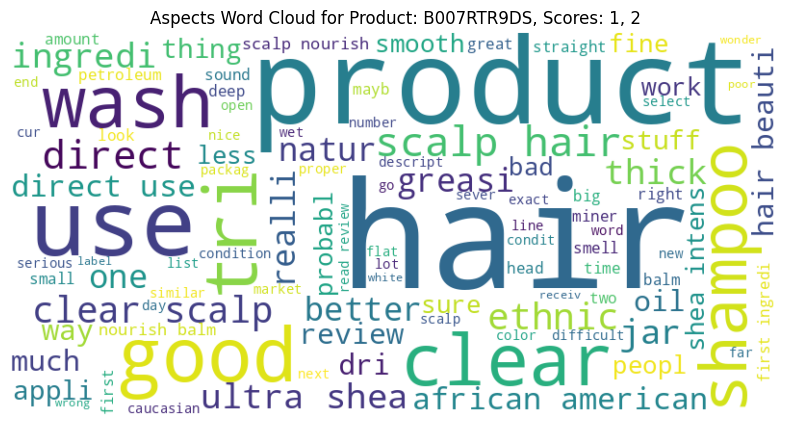

In [ ]:
#Product 1 Aspect Analysis
import spacy
nlp = spacy.load('en_core_web_sm')

# Define product and scores
product = "B007RTR9DS"
scores = [1, 2]

# Filter the data based on product and score
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Define a list to store identified aspects
aspects = []

# Iterate through each review
for review in filtered_data['CleanedText']:
    # Parse the review using the dependency parser
    doc = nlp(review)

    # Extract noun chunks (potential aspects)
    noun_chunks = list(doc.noun_chunks)

    # Iterate through each noun chunk and check if it has a modifier that is an adjective
    for chunk in noun_chunks:
        for token in chunk:
            if token.pos_ == 'ADJ':
                aspects.append(chunk.text)
                break

# Remove duplicates and convert to a string
aspects_string = ' '.join(list(set(aspects)))

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(aspects_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Aspects Word Cloud for Product: {product}, Scores: {', '.join(map(str, scores))}")
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


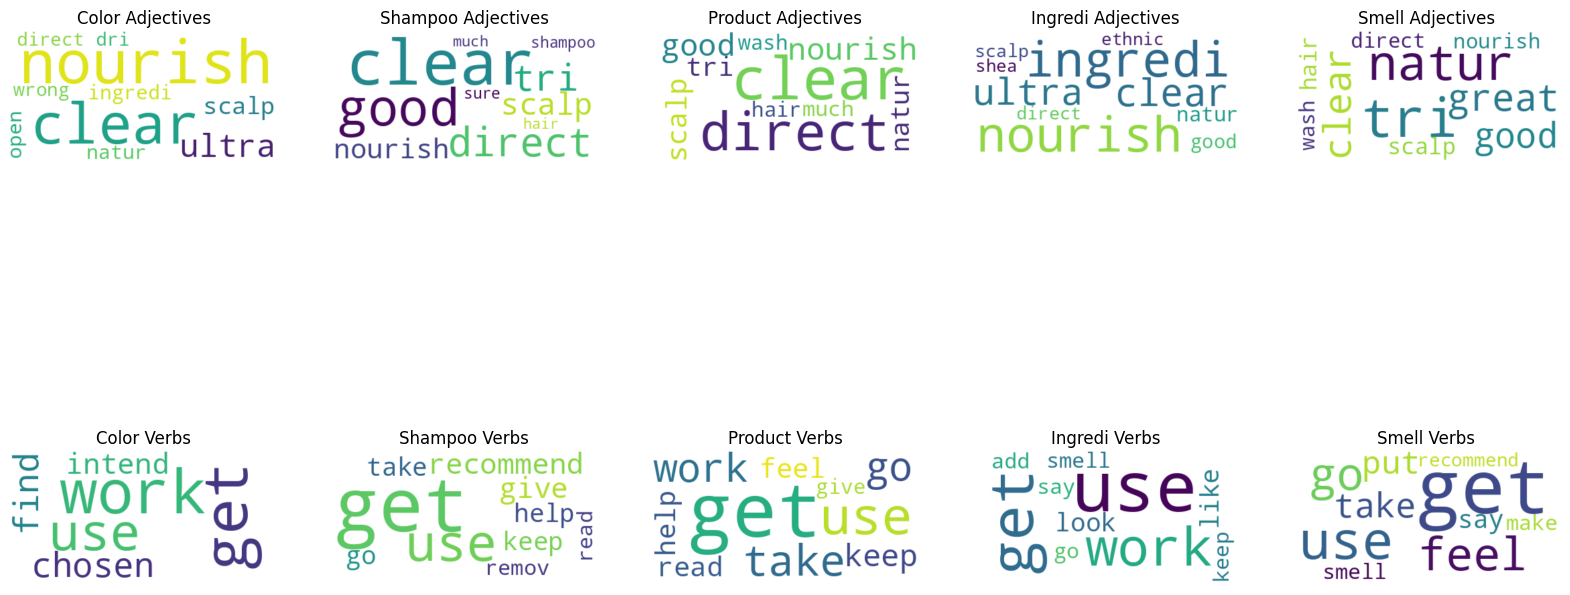

In [ ]:
#Product 1 for Adjective & Verb Analysis
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import nltk
import nltk
nltk.download('averaged_perceptron_tagger')

# Define words to exclude from analysis
exclude_words = {None}

# Define aspects to analyze
aspects = ['color', 'shampoo', 'product', 'ingredi', 'smell']

# Filter the data based on product and score
product = "B007RTR9DS"
scores = [1, 2]
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Initialize a dictionary to store the adjectives and verbs for each aspect
aspect_adjectives = defaultdict(list)
aspect_verbs = defaultdict(list)

#Stopwords
stop_words = set(stopwords.words('english'))
exclude_words = {None}
stop_words = stop_words - exclude_words

# Iterate over each review and extract adjectives and verbs for each aspect
for review in filtered_data['CleanedText']:
    for aspect in aspects:
        if aspect in review.lower():
            words = review.lower().split()
            filtered_words = [word for word in words if (word not in stop_words and word not in exclude_words)]
            for word, pos in nltk.pos_tag(filtered_words):
                if pos == 'JJ':
                    aspect_adjectives[aspect].append(word)
                elif pos == 'VB':
                    aspect_verbs[aspect].append(word)

# Get the top 10 adjectives for each aspect
top_adjectives = {}
for aspect in aspect_adjectives:
    adjective_freq = Counter(aspect_adjectives[aspect])
    top_adjectives[aspect] = adjective_freq.most_common(10)

# Get the top 10 verbs for each aspect
top_verbs = {}
for aspect in aspect_verbs:
    verb_freq = Counter(aspect_verbs[aspect])
    top_verbs[aspect] = verb_freq.most_common(10)

# Create a word cloud for the top adjectives and verbs mentioned for each aspect
fig, axs = plt.subplots(2, len(aspects), figsize=(20, 10))
for i, aspect in enumerate(aspects):
    if aspect in top_adjectives and top_adjectives[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_adjectives[aspect]))
        axs[0, i].imshow(wordcloud, interpolation="bilinear")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"{aspect.capitalize()} Adjectives")

    if aspect in top_verbs and top_verbs[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_verbs[aspect]))
        axs[1, i].imshow(wordcloud, interpolation="bilinear")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"{aspect.capitalize()} Verbs")
plt.show()


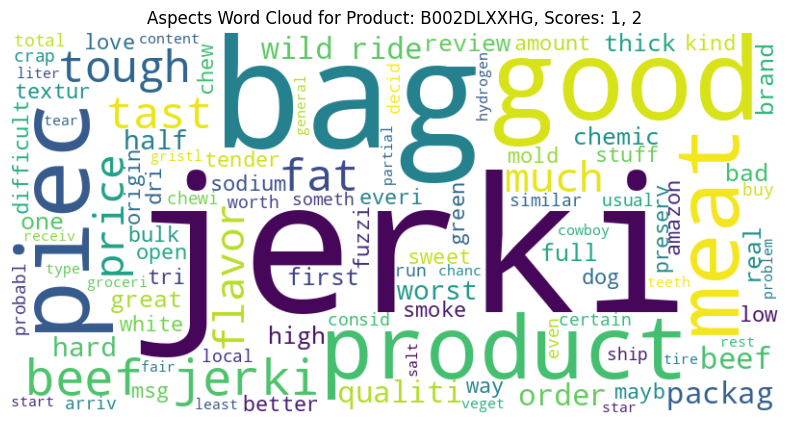

In [ ]:
#Product 2 for Aspect Analysis
import spacy
nlp = spacy.load('en_core_web_sm')

# Define product and scores
product = "B002DLXXHG"
scores = [1, 2]

# Filter the data based on product and score
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Define a list to store identified aspects
aspects = []

# Iterate through each review
for review in filtered_data['CleanedText']:
    # Parse the review using the dependency parser
    doc = nlp(review)

    # Extract noun chunks (potential aspects)
    noun_chunks = list(doc.noun_chunks)

    # Iterate through each noun chunk and check if it has a modifier that is an adjective
    for chunk in noun_chunks:
        for token in chunk:
            if token.pos_ == 'ADJ':
                aspects.append(chunk.text)
                break

# Remove duplicates and convert to a string
aspects_string = ' '.join(list(set(aspects)))

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(aspects_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Aspects Word Cloud for Product: {product}, Scores: {', '.join(map(str, scores))}")
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


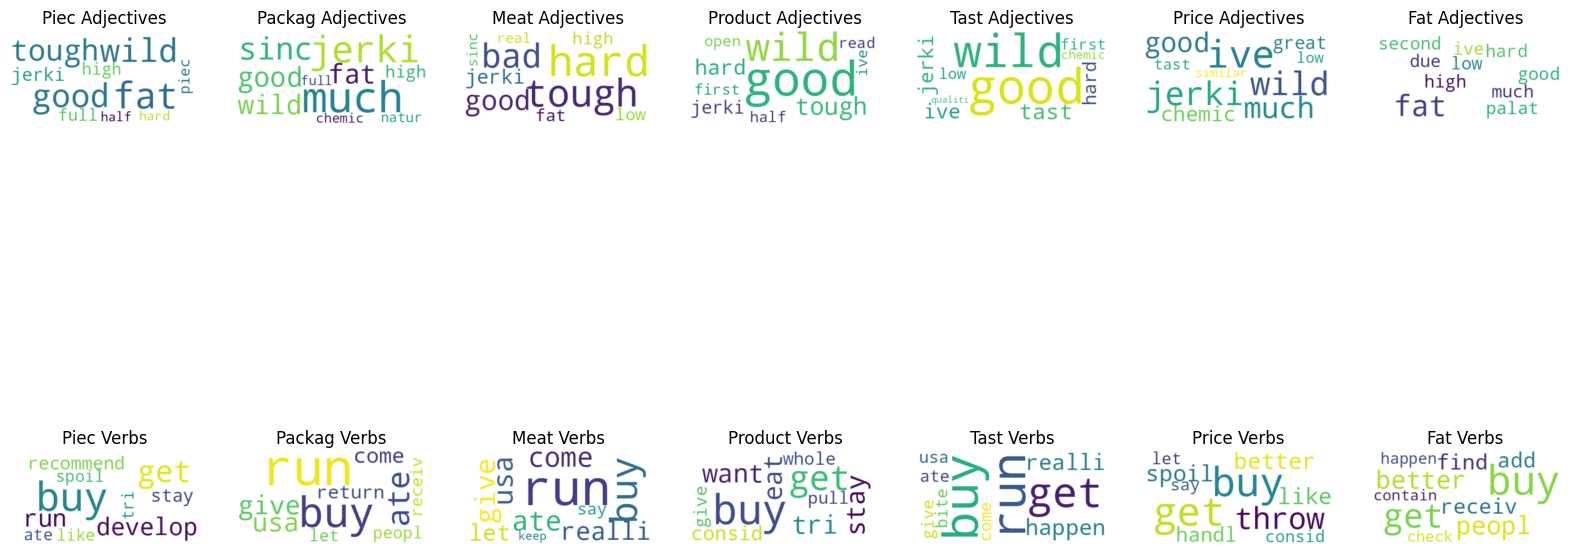

In [ ]:
#Product 2 for Adjective & Verb Analysis
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import nltk
import nltk
nltk.download('averaged_perceptron_tagger')

# Define words to exclude from analysis
exclude_words = {None}

# Define aspects to analyze
aspects = ['piec', 'packag', 'meat', 'product','tast', 'price', 'fat']

# Filter the data based on product and score
product = "B002DLXXHG"
scores = [1, 2]
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Initialize a dictionary to store the adjectives and verbs for each aspect
aspect_adjectives = defaultdict(list)
aspect_verbs = defaultdict(list)

#Stopwords
stop_words = set(stopwords.words('english'))
exclude_words = {None}
stop_words = stop_words - exclude_words

# Iterate over each review and extract adjectives and verbs for each aspect
for review in filtered_data['CleanedText']:
    for aspect in aspects:
        if aspect in review.lower():
            words = review.lower().split()
            filtered_words = [word for word in words if (word not in stop_words and word not in exclude_words)]
            for word, pos in nltk.pos_tag(filtered_words):
                if pos == 'JJ':
                    aspect_adjectives[aspect].append(word)
                elif pos == 'VB':
                    aspect_verbs[aspect].append(word)

# Get the top 10 adjectives for each aspect
top_adjectives = {}
for aspect in aspect_adjectives:
    adjective_freq = Counter(aspect_adjectives[aspect])
    top_adjectives[aspect] = adjective_freq.most_common(10)

# Get the top 10 verbs for each aspect
top_verbs = {}
for aspect in aspect_verbs:
    verb_freq = Counter(aspect_verbs[aspect])
    top_verbs[aspect] = verb_freq.most_common(10)

# Create a word cloud for the top adjectives and verbs mentioned for each aspect
fig, axs = plt.subplots(2, len(aspects), figsize=(20, 10))
for i, aspect in enumerate(aspects):
    if aspect in top_adjectives and top_adjectives[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_adjectives[aspect]))
        axs[0, i].imshow(wordcloud, interpolation="bilinear")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"{aspect.capitalize()} Adjectives")

    if aspect in top_verbs and top_verbs[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_verbs[aspect]))
        axs[1, i].imshow(wordcloud, interpolation="bilinear")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"{aspect.capitalize()} Verbs")
plt.show()


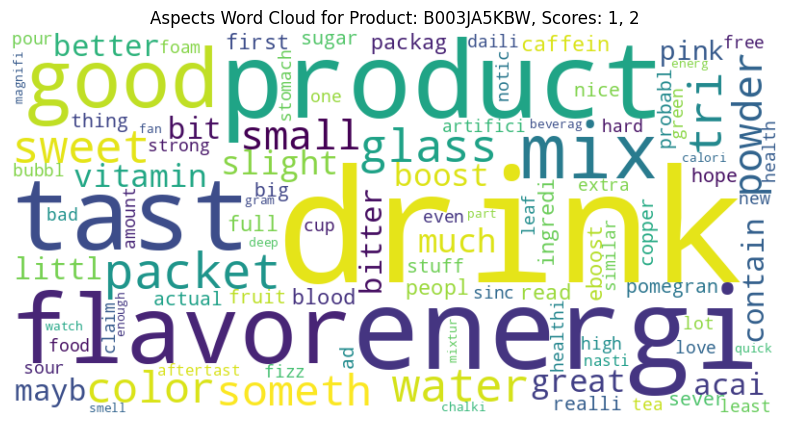

In [ ]:
#Product 3 for Aspect Analysis
import spacy
nlp = spacy.load('en_core_web_sm')

# Define product and scores
product = "B003JA5KBW"
scores = [1, 2]

# Filter the data based on product and score
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Define a list to store identified aspects
aspects = []

# Iterate through each review
for review in filtered_data['CleanedText']:
    # Parse the review using the dependency parser
    doc = nlp(review)

    # Extract noun chunks (potential aspects)
    noun_chunks = list(doc.noun_chunks)

    # Iterate through each noun chunk and check if it has a modifier that is an adjective
    for chunk in noun_chunks:
        for token in chunk:
            if token.pos_ == 'ADJ':
                aspects.append(chunk.text)
                break

# Remove duplicates and convert to a string
aspects_string = ' '.join(list(set(aspects)))

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(aspects_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Aspects Word Cloud for Product: {product}, Scores: {', '.join(map(str, scores))}")
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


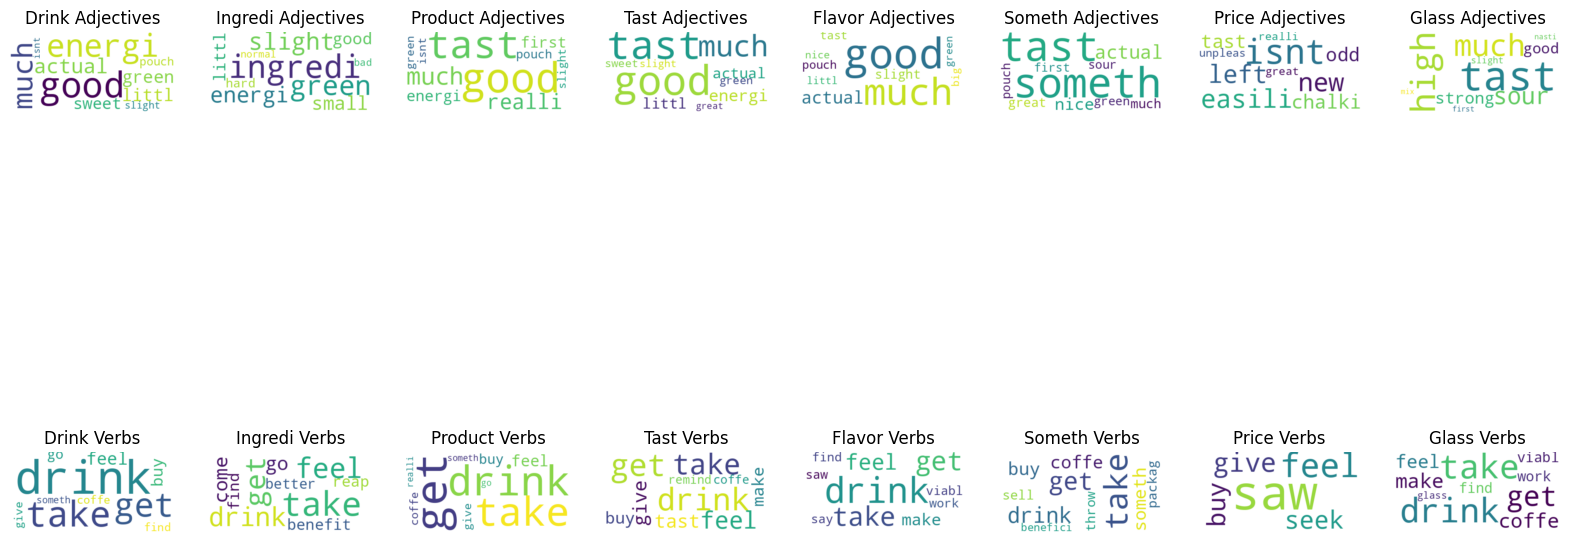

In [ ]:
#Product 3 for Adjective & Verb Analysis
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import nltk
import nltk
nltk.download('averaged_perceptron_tagger')

# Define words to exclude from analysis
exclude_words = {None}

# Define aspects to analyze
aspects = ['drink', 'ingredi', 'product','tast','flavor', 'someth', 'price', 'glass']

# Filter the data based on product and score
product = "B003JA5KBW"
scores = [1, 2]
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Initialize a dictionary to store the adjectives and verbs for each aspect
aspect_adjectives = defaultdict(list)
aspect_verbs = defaultdict(list)

#Stopwords
stop_words = set(stopwords.words('english'))
exclude_words = {None}
stop_words = stop_words - exclude_words

# Iterate over each review and extract adjectives and verbs for each aspect
for review in filtered_data['CleanedText']:
    for aspect in aspects:
        if aspect in review.lower():
            words = review.lower().split()
            filtered_words = [word for word in words if (word not in stop_words and word not in exclude_words)]
            for word, pos in nltk.pos_tag(filtered_words):
                if pos == 'JJ':
                    aspect_adjectives[aspect].append(word)
                elif pos == 'VB':
                    aspect_verbs[aspect].append(word)

# Get the top 10 adjectives for each aspect
top_adjectives = {}
for aspect in aspect_adjectives:
    adjective_freq = Counter(aspect_adjectives[aspect])
    top_adjectives[aspect] = adjective_freq.most_common(10)

# Get the top 10 verbs for each aspect
top_verbs = {}
for aspect in aspect_verbs:
    verb_freq = Counter(aspect_verbs[aspect])
    top_verbs[aspect] = verb_freq.most_common(10)

# Create a word cloud for the top adjectives and verbs mentioned for each aspect
fig, axs = plt.subplots(2, len(aspects), figsize=(20, 10))
for i, aspect in enumerate(aspects):
    if aspect in top_adjectives and top_adjectives[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_adjectives[aspect]))
        axs[0, i].imshow(wordcloud, interpolation="bilinear")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"{aspect.capitalize()} Adjectives")

    if aspect in top_verbs and top_verbs[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_verbs[aspect]))
        axs[1, i].imshow(wordcloud, interpolation="bilinear")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"{aspect.capitalize()} Verbs")
plt.show()


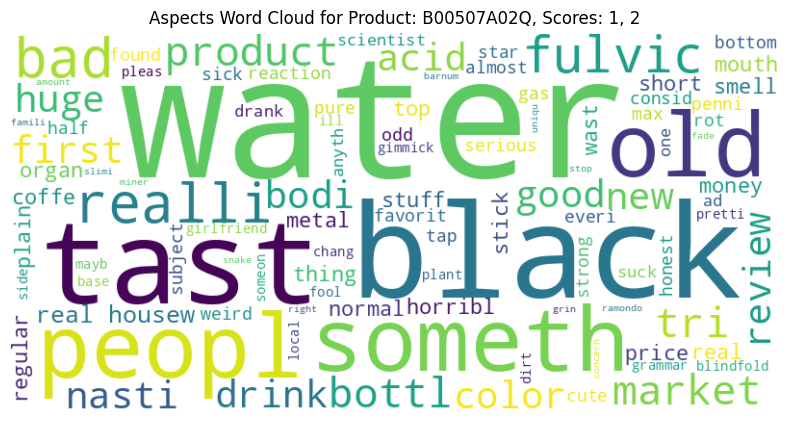

In [ ]:
#Product 4 for Aspect Analysis
import spacy
nlp = spacy.load('en_core_web_sm')

# Define product and scores
product = "B00507A02Q"
scores = [1, 2]

# Filter the data based on product and score
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Define a list to store identified aspects
aspects = []

# Iterate through each review
for review in filtered_data['CleanedText']:
    # Parse the review using the dependency parser
    doc = nlp(review)

    # Extract noun chunks (potential aspects)
    noun_chunks = list(doc.noun_chunks)

    # Iterate through each noun chunk and check if it has a modifier that is an adjective
    for chunk in noun_chunks:
        for token in chunk:
            if token.pos_ == 'ADJ':
                aspects.append(chunk.text)
                break

# Remove duplicates and convert to a string
aspects_string = ' '.join(list(set(aspects)))

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(aspects_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Aspects Word Cloud for Product: {product}, Scores: {', '.join(map(str, scores))}")
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


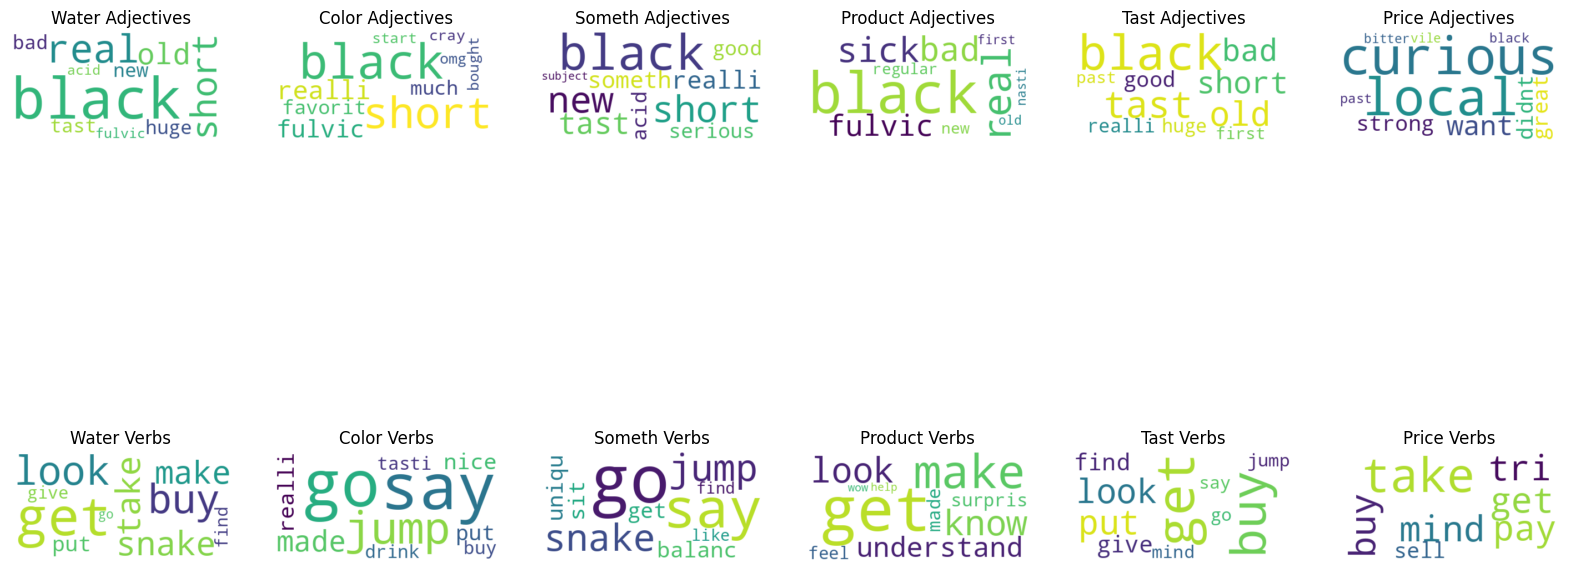

In [ ]:
#Product 4 for Adjective & Verb Analysis
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import nltk
import nltk
nltk.download('averaged_perceptron_tagger')

# Define words to exclude from analysis
exclude_words = {None}

# Define aspects to analyze
aspects = ['water', 'color', 'someth', 'product','tast', 'price']

# Filter the data based on product and score
product = "B00507A02Q"
scores = [1, 2]
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Initialize a dictionary to store the adjectives and verbs for each aspect
aspect_adjectives = defaultdict(list)
aspect_verbs = defaultdict(list)

#Stopwords
stop_words = set(stopwords.words('english'))
exclude_words = {None}
stop_words = stop_words - exclude_words

# Iterate over each review and extract adjectives and verbs for each aspect
for review in filtered_data['CleanedText']:
    for aspect in aspects:
        if aspect in review.lower():
            words = review.lower().split()
            filtered_words = [word for word in words if (word not in stop_words and word not in exclude_words)]
            for word, pos in nltk.pos_tag(filtered_words):
                if pos == 'JJ':
                    aspect_adjectives[aspect].append(word)
                elif pos == 'VB':
                    aspect_verbs[aspect].append(word)

# Get the top 10 adjectives for each aspect
top_adjectives = {}
for aspect in aspect_adjectives:
    adjective_freq = Counter(aspect_adjectives[aspect])
    top_adjectives[aspect] = adjective_freq.most_common(10)

# Get the top 10 verbs for each aspect
top_verbs = {}
for aspect in aspect_verbs:
    verb_freq = Counter(aspect_verbs[aspect])
    top_verbs[aspect] = verb_freq.most_common(10)

# Create a word cloud for the top adjectives and verbs mentioned for each aspect
fig, axs = plt.subplots(2, len(aspects), figsize=(20, 10))
for i, aspect in enumerate(aspects):
    if aspect in top_adjectives and top_adjectives[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_adjectives[aspect]))
        axs[0, i].imshow(wordcloud, interpolation="bilinear")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"{aspect.capitalize()} Adjectives")

    if aspect in top_verbs and top_verbs[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_verbs[aspect]))
        axs[1, i].imshow(wordcloud, interpolation="bilinear")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"{aspect.capitalize()} Verbs")
plt.show()


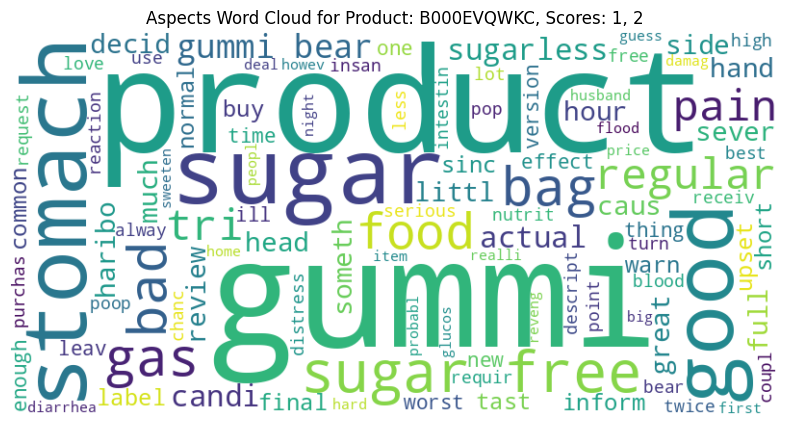

In [ ]:
#Product 5 for Aspect Analysis
import spacy
nlp = spacy.load('en_core_web_sm')

# Define product and scores
product = "B000EVQWKC"
scores = [1, 2]

# Filter the data based on product and score
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Define a list to store identified aspects
aspects = []

# Iterate through each review
for review in filtered_data['CleanedText']:
    # Parse the review using the dependency parser
    doc = nlp(review)

    # Extract noun chunks (potential aspects)
    noun_chunks = list(doc.noun_chunks)

    # Iterate through each noun chunk and check if it has a modifier that is an adjective
    for chunk in noun_chunks:
        for token in chunk:
            if token.pos_ == 'ADJ':
                aspects.append(chunk.text)
                break

# Remove duplicates and convert to a string
aspects_string = ' '.join(list(set(aspects)))

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(aspects_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Aspects Word Cloud for Product: {product}, Scores: {', '.join(map(str, scores))}")
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


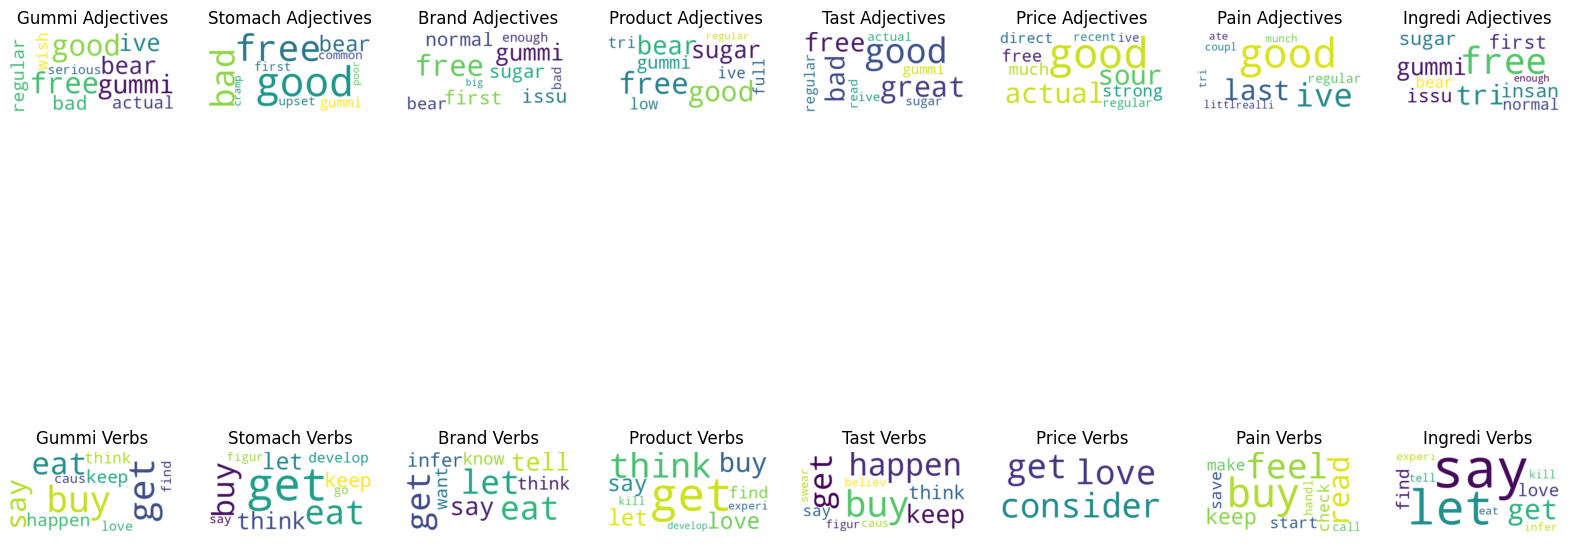

In [ ]:
#Product 5 for Adjective & Verb Analysis
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import nltk
import nltk
nltk.download('averaged_perceptron_tagger')

# Define words to exclude from analysis
exclude_words = {None}

# Define aspects to analyze
aspects = ['gummi', 'stomach', 'brand', 'product','tast','price', 'pain', 'ingredi']

# Filter the data based on product and score
product = "B000EVQWKC"
scores = [1, 2]
filtered_data = df[(df["ProductId"] == product) & (df["Score"].isin(scores))]

# Initialize a dictionary to store the adjectives and verbs for each aspect
aspect_adjectives = defaultdict(list)
aspect_verbs = defaultdict(list)

#Stopwords
stop_words = set(stopwords.words('english'))
exclude_words = {None}
stop_words = stop_words - exclude_words

# Iterate over each review and extract adjectives and verbs for each aspect
for review in filtered_data['CleanedText']:
    for aspect in aspects:
        if aspect in review.lower():
            words = review.lower().split()
            filtered_words = [word for word in words if (word not in stop_words and word not in exclude_words)]
            for word, pos in nltk.pos_tag(filtered_words):
                if pos == 'JJ':
                    aspect_adjectives[aspect].append(word)
                elif pos == 'VB':
                    aspect_verbs[aspect].append(word)

# Get the top 10 adjectives for each aspect
top_adjectives = {}
for aspect in aspect_adjectives:
    adjective_freq = Counter(aspect_adjectives[aspect])
    top_adjectives[aspect] = adjective_freq.most_common(10)

# Get the top 10 verbs for each aspect
top_verbs = {}
for aspect in aspect_verbs:
    verb_freq = Counter(aspect_verbs[aspect])
    top_verbs[aspect] = verb_freq.most_common(10)

# Create a word cloud for the top adjectives and verbs mentioned for each aspect
fig, axs = plt.subplots(2, len(aspects), figsize=(20, 10))
for i, aspect in enumerate(aspects):
    if aspect in top_adjectives and top_adjectives[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_adjectives[aspect]))
        axs[0, i].imshow(wordcloud, interpolation="bilinear")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"{aspect.capitalize()} Adjectives")

    if aspect in top_verbs and top_verbs[aspect]:
        wordcloud = WordCloud(width=400, height=200, max_words=50, background_color="white").generate_from_frequencies(dict(top_verbs[aspect]))
        axs[1, i].imshow(wordcloud, interpolation="bilinear")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"{aspect.capitalize()} Verbs")
plt.show()
